In [1]:
import os
print(os.getcwd())  # Affiche le répertoire de travail actuel

C:\Users\PCS


In [3]:
# Installer Kaggle (si nécessaire)
!pip install kaggle

# Charger un fichier Kaggle exporté (à placer dans le répertoire de travail)
import pandas as pd

df = pd.read_csv("C:/Users/PCS/anaconda3/covid19_tweets.csv", encoding="latin-1")

# Aperçu des premières lignes
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,áá¥â»Õ¬ê Ï®,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile ðºð¸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,ðï¸Official Twitter handle of Department o...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [5]:
df.columns = ['user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'text', 'hashtags', 'source', 'is_retweet']

In [7]:
import re
def clean_tweet(tweet):
    # Retirer les hashtags, mentions et URLs
    tweet = re.sub(r'#\w+', '', tweet)  # Enlever les hashtags
    tweet = re.sub(r'@\w+', '', tweet)  # Enlever les mentions
    tweet = re.sub(r'http\S+', '', tweet)  # Enlever les URLs
    return tweet.strip()

# Assuming the tweet column is now 'tweet'
df['cleaned_text'] = df['text'].apply(clean_tweet)

# Show the cleaned tweets
print(df[['text', 'cleaned_text']].head(1000))


                                                  text  \
0    If I smelled the scent of hand sanitizers toda...   
1    Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2    @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3    @brookbanktv The one gift #COVID19 has give me...   
4    25 July : Media Bulletin on Novel #CoronaVirus...   
..                                                 ...   
995  @CassieCeleste @lobster_nanny I do understand....   
996  My job isnât to enlighten you #fuck #already...   
997  #COVID19 reflection in a street art, #Kharkiv,...   
998  Nice Read.\n@MoriangoJr @AdanZamuh @kunga_ @mo...   
999  Treat every single decision you take regarding...   

                                          cleaned_text  
0    If I smelled the scent of hand sanitizers toda...  
1    Hey   and  - wouldn't it have made more sense ...  
2    Trump never once claimed  was a hoax. We all c...  
3    The one gift  has give me is an appreciation f...  
4          25 July

In [112]:
import pandas as pd

# Example: Load your full dataset (replace with your actual file path or data)
# Assuming you have a full dataset 'df' already loaded
# df = pd.read_csv('your_dataset.csv')  # Load your dataset

# Create a subset (e.g., taking the first 800 rows)
df_subset = df.head(10000)

# The rest of your tokenization code can follow:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download the required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Function to process each tweet
def process_tweet(tweet):
    # Tokenization
    words = word_tokenize(tweet)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w.lower() in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    return words

# Apply the function to the 'cleaned_text' column and create a new column 'processed_tweet'
df_subset['processed_tweet'] = df_subset['cleaned_text'].apply(process_tweet)

# Show the processed tweets
print(df_subset[['cleaned_text', 'processed_tweet']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PCS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PCS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                        cleaned_text  \
0  If I smelled the scent of hand sanitizers toda...   
1  Hey   and  - wouldn't it have made more sense ...   
2  Trump never once claimed  was a hoax. We all c...   
3  The one gift  has give me is an appreciation f...   
4        25 July : Media Bulletin on Novel   \n   ¦   

                                     processed_tweet  
0  [smell, scent, hand, sanit, today, someon, pas...  
1  [hey, -, would, n't, made, sens, player, pay, ...  
2  [trump, never, claim, hoax, ., claim, effort, ...  
3  [one, gift, give, appreci, simpl, thing, alway...  
4          [25, juli, :, media, bulletin, novel, ¦]  


C:\Users\PCS\AppData\Local\Temp\ipykernel_14972\3036752953.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['processed_tweet'] = df_subset['cleaned_text'].apply(process_tweet)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize the TF-IDF vectorizer (removes common English words and limits to 1000 words)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Transform the cleaned tweets into numerical vectors (TF-IDF values)
X = vectorizer.fit_transform(df['cleaned_text'])

# Get the words (features) corresponding to the columns of the matrix
words = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix into a DataFrame for easier viewing
df_tfidf = pd.DataFrame(X.toarray(), columns=words)

# Show the top 5 rows of the TF-IDF DataFrame
print(df_tfidf.head())


    00  000   01   07   08   10  100   11   12   13  ...   yâ  zealand  zero  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   0.0   

    ªð   ºð  ¼19   ¼ï   ¼ð   ¾à   àµ  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 1000 columns]


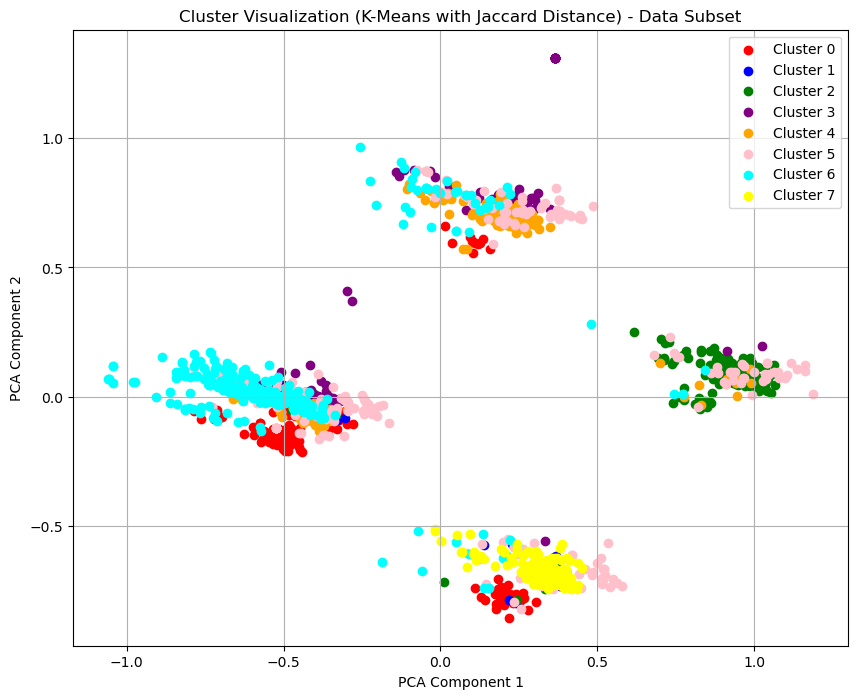

In [22]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select a subset of the first 800 rows from the DataFrame
df_subset = df_subset.head(2000)

# Function to convert words into binary vectors
def convert_to_vector(words, vocab):
    return [1 if term in words else 0 for term in vocab]

# Create the unique vocabulary from the subset
vocab = set(word for words in df_subset['processed_tweet'] for word in words)

# Convert tweets to binary vectors (explicit conversion to boolean)
binary_vectors = np.array([convert_to_vector(words, vocab) for words in df_subset['processed_tweet']], dtype=bool)

# Function to compute the Jaccard distance matrix
def jaccard_dist_matrix(binary_vectors):
    return pairwise_distances(binary_vectors, metric='jaccard')

# Custom K-Means algorithm with Jaccard distance
def kmeans_with_jaccard(binary_vectors, clusters_count, max_iter=100, random_state=42):
    np.random.seed(random_state)
    total_samples = binary_vectors.shape[0]
    
    # Random initialization of centroids
    init_centroids_idx = np.random.choice(total_samples, clusters_count, replace=False)
    centroids = binary_vectors[init_centroids_idx]
    
    for _ in range(max_iter):
        # Compute Jaccard distances
        distances = pairwise_distances(binary_vectors, centroids, metric='jaccard')
        
        # Assign clusters based on closest centroid
        cluster_labels = np.argmin(distances, axis=1)
        
        # Update centroids
        new_centroids = []
        for i in range(clusters_count):
            cluster_points = binary_vectors[cluster_labels == i]
            if len(cluster_points) > 0:
                medoid_idx = np.argmin(np.sum(pairwise_distances(cluster_points, cluster_points, metric='jaccard'), axis=1))
                new_centroids.append(cluster_points[medoid_idx])
            else:
                # Reinitialize centroid if cluster is empty
                new_centroids.append(binary_vectors[np.random.choice(total_samples)])
        
        new_centroids = np.array(new_centroids)
        
        # Check for convergence
        if np.array_equal(centroids, new_centroids):
            break
        centroids = new_centroids

    return cluster_labels, centroids

# Apply K-Means with Jaccard distance on the subset
clusters_count = 8
cluster_labels, centroids = kmeans_with_jaccard(binary_vectors, clusters_count)

# Add cluster labels to the subset data
df_subset['cluster'] = cluster_labels

# Dimensionality reduction for visualization (PCA)
pca_model = PCA(n_components=2)
reduced_vectors = pca_model.fit_transform(binary_vectors)

# Define custom colors for the clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'cyan', 'yellow']

# Plot the clusters for the subset with custom colors
plt.figure(figsize=(10, 8))
for i in range(clusters_count):
    cluster_points = reduced_vectors[df_subset['cluster'] == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i}", color=colors[i])
plt.title("Cluster Visualization (K-Means with Jaccard Distance) - Data Subset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()


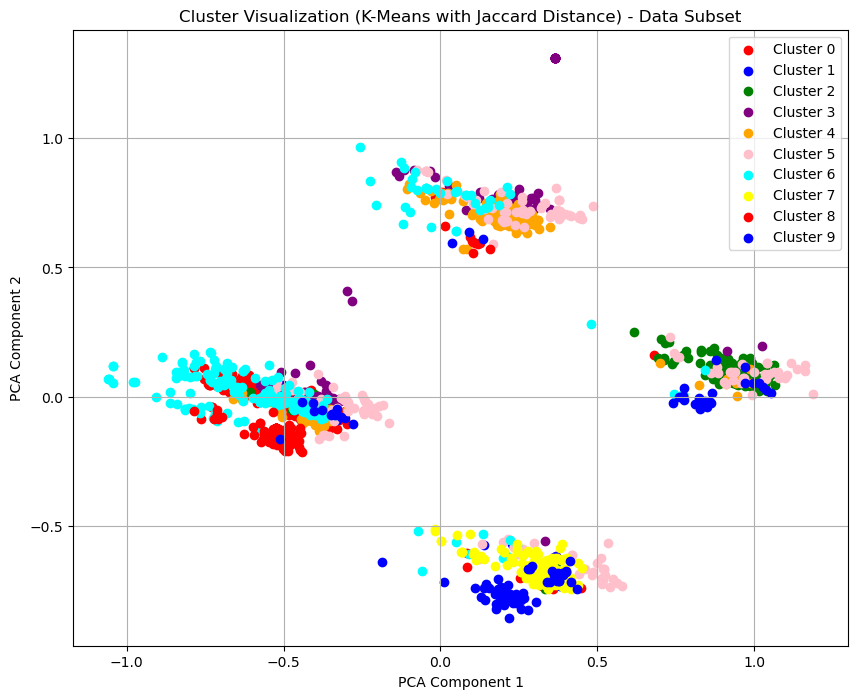

In [30]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select a subset of the first 800 rows from the DataFrame
df_subset = df_subset.head(2000)

# Function to convert words into binary vectors
def convert_to_vector(words, vocab):
    return [1 if term in words else 0 for term in vocab]

# Create the unique vocabulary from the subset
vocab = set(word for words in df_subset['processed_tweet'] for word in words)

# Convert tweets to binary vectors (explicit conversion to boolean)
binary_vectors = np.array([convert_to_vector(words, vocab) for words in df_subset['processed_tweet']], dtype=bool)

# Function to compute the Jaccard distance matrix
def jaccard_dist_matrix(binary_vectors):
    return pairwise_distances(binary_vectors, metric='jaccard')

# Custom K-Means algorithm with Jaccard distance
def kmeans_with_jaccard(binary_vectors, clusters_count, max_iter=100, random_state=42):
    np.random.seed(random_state)
    total_samples = binary_vectors.shape[0]
    
    # Random initialization of centroids
    init_centroids_idx = np.random.choice(total_samples, clusters_count, replace=False)
    centroids = binary_vectors[init_centroids_idx]
    
    for _ in range(max_iter):
        # Compute Jaccard distances
        distances = pairwise_distances(binary_vectors, centroids, metric='jaccard')
        
        # Assign clusters based on closest centroid
        cluster_labels = np.argmin(distances, axis=1)
        
        # Update centroids
        new_centroids = []
        for i in range(clusters_count):
            cluster_points = binary_vectors[cluster_labels == i]
            if len(cluster_points) > 0:
                medoid_idx = np.argmin(np.sum(pairwise_distances(cluster_points, cluster_points, metric='jaccard'), axis=1))
                new_centroids.append(cluster_points[medoid_idx])
            else:
                # Reinitialize centroid if cluster is empty
                new_centroids.append(binary_vectors[np.random.choice(total_samples)])
        
        new_centroids = np.array(new_centroids)
        
        # Check for convergence
        if np.array_equal(centroids, new_centroids):
            break
        centroids = new_centroids

    return cluster_labels, centroids

# Apply K-Means with Jaccard distance on the subset
clusters_count = 10
cluster_labels, centroids = kmeans_with_jaccard(binary_vectors, clusters_count)

# Add cluster labels to the subset data
df_subset['cluster'] = cluster_labels

# Dimensionality reduction for visualization (PCA)
pca_model = PCA(n_components=2)
reduced_vectors = pca_model.fit_transform(binary_vectors)

# Define custom colors for the clusters and repeat them if necessary
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'cyan', 'yellow']
colors = (colors * ((clusters_count // len(colors)) + 1))[:clusters_count]  # Repeat colors if needed

# Plot the clusters for the subset with custom colors
plt.figure(figsize=(10, 8))
for i in range(clusters_count):
    cluster_points = reduced_vectors[df_subset['cluster'] == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i}", color=colors[i])
plt.title("Cluster Visualization (K-Means with Jaccard Distance) - Data Subset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()


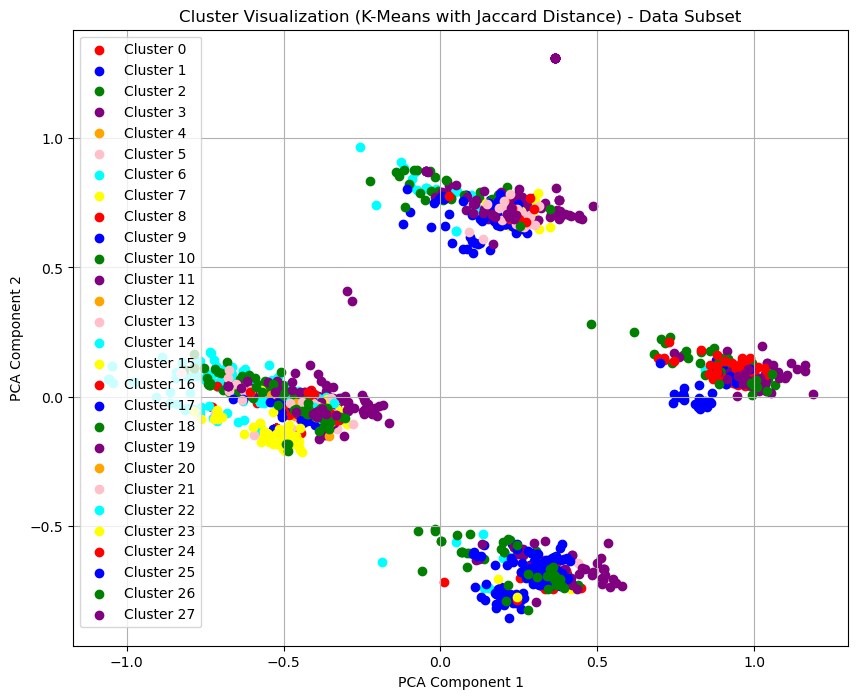

In [32]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select a subset of the first 800 rows from the DataFrame
df_subset = df_subset.head(2000)

# Function to convert words into binary vectors
def convert_to_vector(words, vocab):
    return [1 if term in words else 0 for term in vocab]

# Create the unique vocabulary from the subset
vocab = set(word for words in df_subset['processed_tweet'] for word in words)

# Convert tweets to binary vectors (explicit conversion to boolean)
binary_vectors = np.array([convert_to_vector(words, vocab) for words in df_subset['processed_tweet']], dtype=bool)

# Function to compute the Jaccard distance matrix
def jaccard_dist_matrix(binary_vectors):
    return pairwise_distances(binary_vectors, metric='jaccard')

# Custom K-Means algorithm with Jaccard distance
def kmeans_with_jaccard(binary_vectors, clusters_count, max_iter=100, random_state=42):
    np.random.seed(random_state)
    total_samples = binary_vectors.shape[0]
    
    # Random initialization of centroids
    init_centroids_idx = np.random.choice(total_samples, clusters_count, replace=False)
    centroids = binary_vectors[init_centroids_idx]
    
    for _ in range(max_iter):
        # Compute Jaccard distances
        distances = pairwise_distances(binary_vectors, centroids, metric='jaccard')
        
        # Assign clusters based on closest centroid
        cluster_labels = np.argmin(distances, axis=1)
        
        # Update centroids
        new_centroids = []
        for i in range(clusters_count):
            cluster_points = binary_vectors[cluster_labels == i]
            if len(cluster_points) > 0:
                medoid_idx = np.argmin(np.sum(pairwise_distances(cluster_points, cluster_points, metric='jaccard'), axis=1))
                new_centroids.append(cluster_points[medoid_idx])
            else:
                # Reinitialize centroid if cluster is empty
                new_centroids.append(binary_vectors[np.random.choice(total_samples)])
        
        new_centroids = np.array(new_centroids)
        
        # Check for convergence
        if np.array_equal(centroids, new_centroids):
            break
        centroids = new_centroids

    return cluster_labels, centroids

# Apply K-Means with Jaccard distance on the subset
clusters_count = 28
cluster_labels, centroids = kmeans_with_jaccard(binary_vectors, clusters_count)

# Add cluster labels to the subset data
df_subset['cluster'] = cluster_labels

# Dimensionality reduction for visualization (PCA)
pca_model = PCA(n_components=2)
reduced_vectors = pca_model.fit_transform(binary_vectors)

# Define custom colors for the clusters and repeat them if necessary
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'cyan', 'yellow']
colors = (colors * ((clusters_count // len(colors)) + 1))[:clusters_count]  # Repeat colors if needed

# Plot the clusters for the subset with custom colors
plt.figure(figsize=(10, 8))
for i in range(clusters_count):
    cluster_points = reduced_vectors[df_subset['cluster'] == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i}", color=colors[i])
plt.title("Cluster Visualization (K-Means with Jaccard Distance) - Data Subset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()


In [34]:
!pip install scikit-fuzzy

In [36]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

C:\Users\PCS\AppData\Local\Temp\ipykernel_14972\3619565151.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', num_clusters)  # 'tab20' is a color map with 20 distinct colors


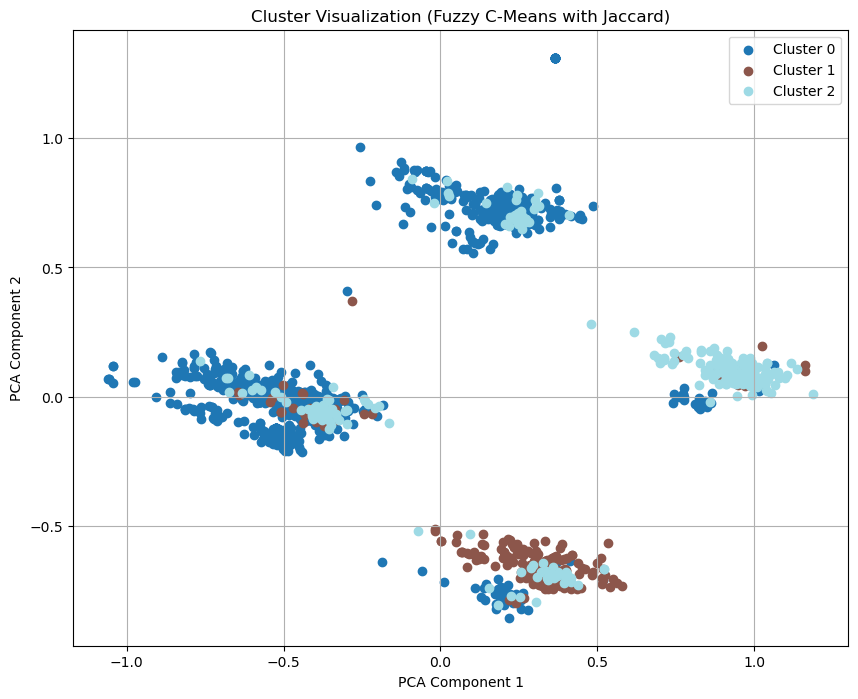

In [68]:
import numpy as np
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Convert data to binary
binary_vectors = (vectors > 0).astype(int)

# Compute Jaccard distance matrix (optional: this line can be skipped as it's not used directly in Fuzzy C-Means)
jaccard_distances = pdist(binary_vectors, metric="jaccard")

# Initialize centroids randomly
num_clusters = 3
np.random.seed(42)
initial_indices = np.random.choice(binary_vectors.shape[0], num_clusters, replace=False)
centroids = binary_vectors[initial_indices]

# Compute memberships for each data point and cluster
def compute_memberships(data, centroids, m=2):
    num_data = data.shape[0]
    num_clusters = centroids.shape[0]
    memberships = np.zeros((num_clusters, num_data))

    for i, centroid in enumerate(centroids):
        distances = np.array([1 - np.sum(np.minimum(data[j], centroid)) / np.sum(np.maximum(data[j], centroid)) 
                              if np.sum(np.maximum(data[j], centroid)) > 0 else 1 for j in range(num_data)])

        for j in range(num_data):
            memberships[i, j] = 1.0 if distances[j] == 0 else 1.0 / np.sum((distances[j] / (distances + 1e-10)) ** (2 / (m - 1)))
    return memberships

# Fuzzy C-Means algorithm
max_iterations = 100
tolerance = 1e-5
m = 2

for _ in range(max_iterations):
    memberships = compute_memberships(binary_vectors, centroids, m)
    new_centroids = np.dot(memberships, binary_vectors) / np.sum(memberships, axis=1, keepdims=True)

    # Convergence check
    if np.linalg.norm(new_centroids - centroids) < tolerance:
        break
    centroids = new_centroids

# Assign final clusters
final_clusters = np.argmax(memberships, axis=0)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(binary_vectors)

# Generate a color map with enough distinct colors
colors = cm.get_cmap('tab20', num_clusters)  # 'tab20' is a color map with 20 distinct colors

# Plot the clusters with custom colors
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_points = reduced_vectors[final_clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", color=colors(cluster))

plt.title("Cluster Visualization (Fuzzy C-Means with Jaccard)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()


In [50]:
import matplotlib.pyplot as plt

colors = plt.get_cmap('tab20', num_clusters)


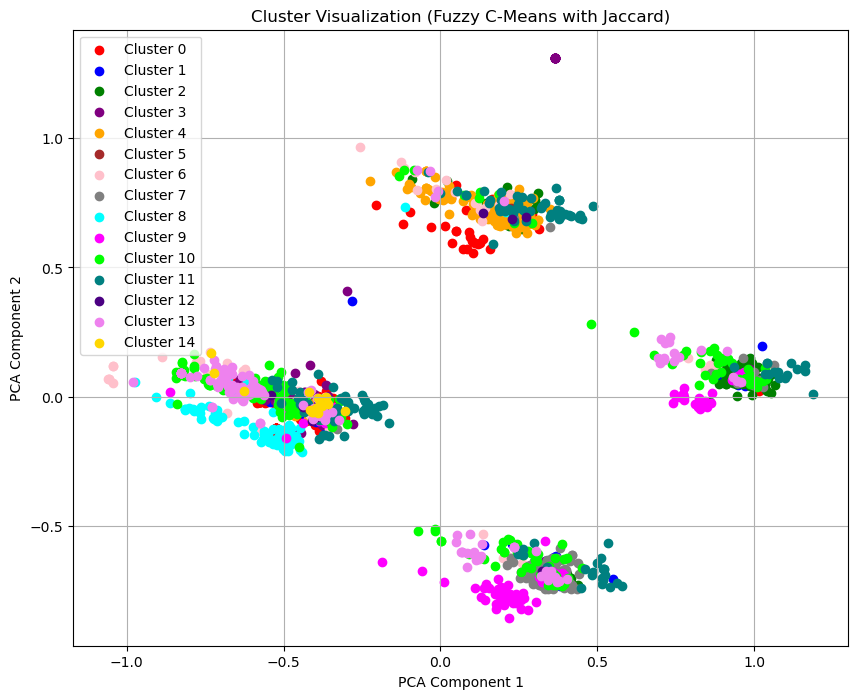

In [58]:
import numpy as np
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Convert data to binary
binary_vectors = (vectors > 0).astype(int)

# Compute Jaccard distance matrix (optional: this line can be skipped as it's not used directly in Fuzzy C-Means)
jaccard_distances = pdist(binary_vectors, metric="jaccard")

# Initialize centroids randomly
num_clusters = 15
np.random.seed(42)
initial_indices = np.random.choice(binary_vectors.shape[0], num_clusters, replace=False)
centroids = binary_vectors[initial_indices]

# Compute memberships for each data point and cluster
def compute_memberships(data, centroids, m=2):
    num_data = data.shape[0]
    num_clusters = centroids.shape[0]
    memberships = np.zeros((num_clusters, num_data))

    for i, centroid in enumerate(centroids):
        distances = np.array([1 - np.sum(np.minimum(data[j], centroid)) / np.sum(np.maximum(data[j], centroid)) 
                              if np.sum(np.maximum(data[j], centroid)) > 0 else 1 for j in range(num_data)])

        for j in range(num_data):
            memberships[i, j] = 1.0 if distances[j] == 0 else 1.0 / np.sum((distances[j] / (distances + 1e-10)) ** (2 / (m - 1)))
    return memberships

# Fuzzy C-Means algorithm
max_iterations = 100
tolerance = 1e-5
m = 2

for _ in range(max_iterations):
    memberships = compute_memberships(binary_vectors, centroids, m)
    new_centroids = np.dot(memberships, binary_vectors) / np.sum(memberships, axis=1, keepdims=True)

    # Convergence check
    if np.linalg.norm(new_centroids - centroids) < tolerance:
        break
    centroids = new_centroids

# Assign final clusters
final_clusters = np.argmax(memberships, axis=0)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(binary_vectors)

# Generate a color map with enough distinct colors
colors = cm.get_cmap('tab20', num_clusters)  # 'tab20' is a color map with 20 distinct colors

# Plot the clusters with custom colors
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_points = reduced_vectors[final_clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", color=colors(cluster))

plt.title("Cluster Visualization (Fuzzy C-Means with Jaccard)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()


C:\Users\PCS\AppData\Local\Temp\ipykernel_14972\1087649039.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', num_clusters)  # 'tab20' is a color map with 20 distinct colors


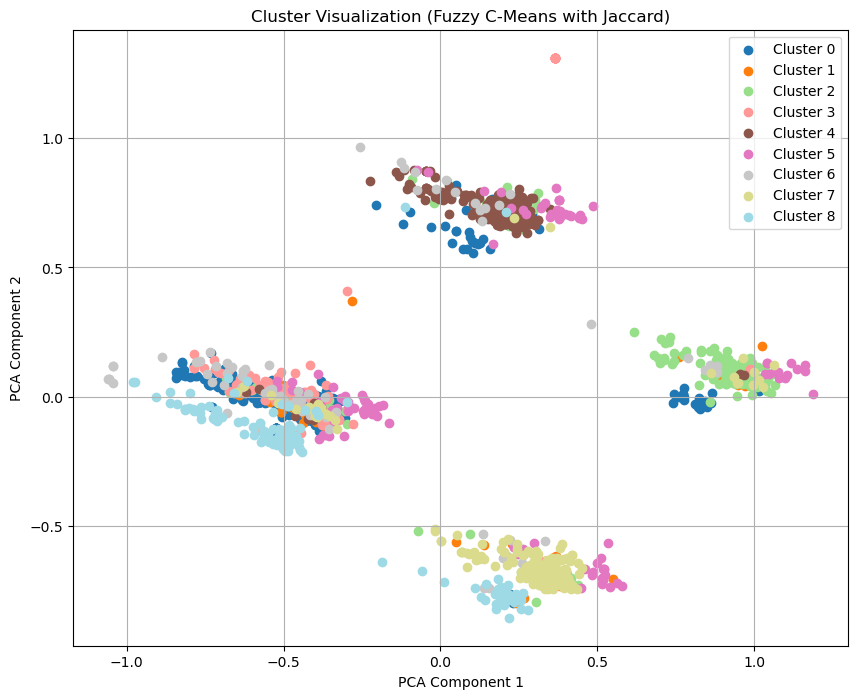

In [64]:
import numpy as np
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Convert data to binary
binary_vectors = (vectors > 0).astype(int)

# Compute Jaccard distance matrix (optional: this line can be skipped as it's not used directly in Fuzzy C-Means)
jaccard_distances = pdist(binary_vectors, metric="jaccard")

# Initialize centroids randomly
num_clusters = 9
np.random.seed(42)
initial_indices = np.random.choice(binary_vectors.shape[0], num_clusters, replace=False)
centroids = binary_vectors[initial_indices]

# Compute memberships for each data point and cluster
def compute_memberships(data, centroids, m=2):
    num_data = data.shape[0]
    num_clusters = centroids.shape[0]
    memberships = np.zeros((num_clusters, num_data))

    for i, centroid in enumerate(centroids):
        distances = np.array([1 - np.sum(np.minimum(data[j], centroid)) / np.sum(np.maximum(data[j], centroid)) 
                              if np.sum(np.maximum(data[j], centroid)) > 0 else 1 for j in range(num_data)])

        for j in range(num_data):
            memberships[i, j] = 1.0 if distances[j] == 0 else 1.0 / np.sum((distances[j] / (distances + 1e-10)) ** (2 / (m - 1)))
    return memberships

# Fuzzy C-Means algorithm
max_iterations = 100
tolerance = 1e-5
m = 2

for _ in range(max_iterations):
    memberships = compute_memberships(binary_vectors, centroids, m)
    new_centroids = np.dot(memberships, binary_vectors) / np.sum(memberships, axis=1, keepdims=True)

    # Convergence check
    if np.linalg.norm(new_centroids - centroids) < tolerance:
        break
    centroids = new_centroids

# Assign final clusters
final_clusters = np.argmax(memberships, axis=0)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(binary_vectors)

# Generate a color map with enough distinct colors
colors = cm.get_cmap('tab20', num_clusters)  # 'tab20' is a color map with 20 distinct colors


# Plot the clusters with custom colors
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_points = reduced_vectors[final_clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", color=colors(cluster))

plt.title("Cluster Visualization (Fuzzy C-Means with Jaccard)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()


In [108]:
import numpy as np
from sklearn.cluster import KMeans

# Set the number of clusters
num_clusters = 4
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit K-Means on the tweet vectors
kmeans_model.fit(vectors)

# Function to find the representative tweet for each cluster
def get_representative_tweets(tweet_vectors, labels, centroids):
    """Find the index of the tweet closest to each cluster centroid."""
    rep_tweets = {}
    for cluster_id in range(len(centroids)):
        # Get indices of the tweets in this cluster
        cluster_indices = np.where(labels == cluster_id)[0]
        
        # Calculate distances from the centroid and find the closest tweet
        distances = np.linalg.norm(tweet_vectors[cluster_indices] - centroids[cluster_id], axis=1)
        closest_tweet_idx = cluster_indices[np.argmin(distances)]
        
        rep_tweets[cluster_id] = closest_tweet_idx
    return rep_tweets

# Get the labels and centroids from K-Means
cluster_labels = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_

# Find the indices of representative tweets for each cluster
representative_tweets = get_representative_tweets(vectors, cluster_labels, centroids)

# Display the representative tweet for each cluster
print("Representative tweets for each K-Means cluster:")
for cluster_id, tweet_idx in representative_tweets.items():
    tweet_text = df_subset.iloc[tweet_idx]['cleaned_text']
    print(f"Cluster {cluster_id}: {tweet_text}")


Representative tweets for each K-Means cluster:
Cluster 0: Tens of thousands of Americans are being infected by  daily, millions face imminent eviction and peaceful pâ¦
Cluster 1: IIT Kharagpur researchers develop Novel Technology for COVID-19 rapid test

,â¦
Cluster 2: I was doing this before
Cluster 3: More than once.


In [96]:
import numpy as np

# Initialisation d'exemple pour 'u' (matrice de membres flous) et 'df_subset' (jeu de données des tweets)
u = np.random.rand(8, 10)  # Supposons 5 clusters et 10 tweets
u = u / u.sum(axis=0, keepdims=True)  # Normalisation de la matrice pour qu'elle soit une probabilité

# Fonction pour obtenir les tweets les plus représentatifs pour chaque cluster
def get_representative_tweets(u, df_subset):
    representative_tweets = {}
    for cluster in range(u.shape[0]):
        # Trouver l'index du tweet avec la plus grande probabilité pour ce cluster
        closest_index = np.argmax(u[cluster])  # Cherche l'index du tweet avec la probabilité maximale
        representative_tweets[cluster] = closest_index  # Enregistre l'index
    return representative_tweets

# Obtenir les indices des tweets représentatifs
representative_tweets = get_representative_tweets(u, df_subset)

# Afficher les tweets représentatifs
print("\nTweets représentatifs pour Fuzzy C-Means :")
for cluster, index in representative_tweets.items():
    # Affiche le texte du tweet correspondant à l'index
    print(f"Cluster {cluster}: {df_subset.iloc[index]['cleaned_text']}")



Tweets représentatifs pour Fuzzy C-Means :
Cluster 0: POPE AS GOD - Prophet Sadhu Sundar Selvaraj. Watch here at  

 ¦
Cluster 1: You now have to wear face coverings when out shopping - this includes a visit to your local Community Pharmacyâ¦
Cluster 2: Hey   and  - wouldn't it have made more sense to have the players pay their respects to the Aâ¦
Cluster 3: Trump never once claimed  was a hoax. We all claim that this effort toâ¦
Cluster 4: Praying for good health and recovery of  .
Cluster 5: You now have to wear face coverings when out shopping - this includes a visit to your local Community Pharmacyâ¦
Cluster 6: Trump never once claimed  was a hoax. We all claim that this effort toâ¦
Cluster 7: Praying for good health and recovery of  .
